# Import libraries 

In [3]:
!pip install mlxtend

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [3]:
titanic = pd.read_csv("C:/Users/chira/Downloads/Titanic.csv")
titanic



,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [4]:
df=pd.get_dummies(titanic)
df.head()





,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


# Apriori Algorithm 

In [45]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.786461,(Gender_Male)
1,0.950477,(Age_Adult)
2,0.676965,(Survived_No)
3,0.757383,"(Gender_Male, Age_Adult)"
4,0.619718,"(Gender_Male, Survived_No)"
5,0.653339,"(Age_Adult, Survived_No)"
6,0.603816,"(Gender_Male, Age_Adult, Survived_No)"


In [5]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules
rules.sort_values('lift',ascending = False)

NameError: name 'frequent_itemsets' is not defined

#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [47]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(Gender_Male, Age_Adult)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,0.091095,1.593193
11,(Survived_No),"(Gender_Male, Age_Adult)",0.676965,0.757383,0.603816,0.891946,1.177669,0.091095,2.245337
8,"(Age_Adult, Survived_No)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152
9,(Gender_Male),"(Age_Adult, Survived_No)",0.786461,0.653339,0.603816,0.767764,1.175139,0.089991,1.492710
2,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634
3,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187
7,"(Gender_Male, Survived_No)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
10,(Age_Adult),"(Gender_Male, Survived_No)",0.950477,0.619718,0.603816,0.635277,1.025106,0.014788,1.042660
4,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
5,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023


In [48]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
1,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116
2,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634
3,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187
4,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
5,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
6,"(Gender_Male, Age_Adult)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,0.091095,1.593193
7,"(Gender_Male, Survived_No)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
8,"(Age_Adult, Survived_No)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152
9,(Gender_Male),"(Age_Adult, Survived_No)",0.786461,0.653339,0.603816,0.767764,1.175139,0.089991,1.492710


In [6]:
rules[['support','confidence']].hist()

NameError: name 'rules' is not defined

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

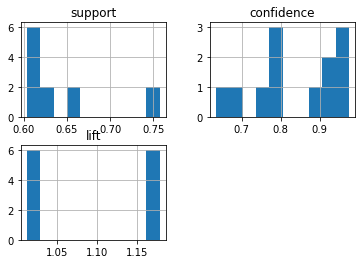

In [50]:
rules[['support','confidence','lift']].hist()

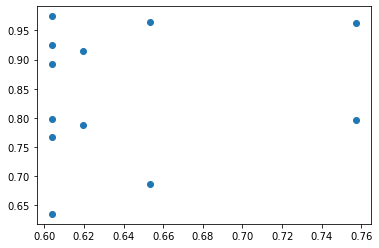

In [51]:
import matplotlib.pyplot as plt

#x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
#y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(rules['support'], rules['confidence'])
plt.show()
%matplotlib inline

C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


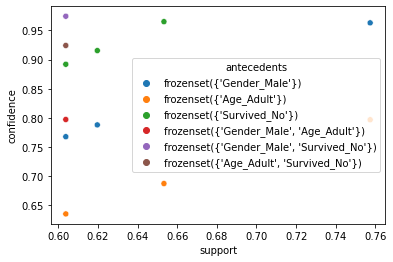

In [52]:
import seaborn as sns
sns.scatterplot('support', 'confidence', data=rules, hue='antecedents')
plt.show()

In [53]:
!pip install nsepython


In [2]:
from nsepython import *   
print(indices)

['NIFTY', 'FINNIFTY', 'BANKNIFTY']


In [ ]:
oi_data, ltp, crontime = oi_chain_builder("RELIANCE","latest","full")
print(oi_data)
print(ltp)
print(crontime)
